In [1]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [3]:
#two functions for plotting images

def plot_image(img: np.array):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')

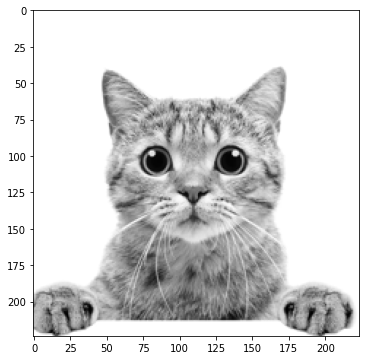

In [5]:
# let's load the image
img = Image.open('cat.webp')
img=ImageOps.grayscale(img)
img=img.resize(size=(224, 224))
plot_image(img=img)

#### Declare filter for convolutions

In [6]:
sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

blur = np.array([[0.0625, 0.125, 0.0625],
                 [0.125, 0.25, 0.125],
                 [0.0625, 0.125, 0.0625]
               
               
])

outline = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])


In [7]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # from 0 up to img size (if img size=224, then up to 223)
    
    for i in range(img_size):
        #add the kenel size (let's say 3) to the current i 
        added = i + kernel_size
        
        # it must be lower than the image size
        
        if added <= img_size:
            #increment if so
            num_pixels += 1
            
    return num_pixels

In [8]:
calculate_target_size(img_size=224, kernel_size=3)

222

In [9]:
calculate_target_size(img_size=224, kernel_size=5)

220

In [10]:
subset = np.array(img)[0:0+3, 0:0+3]
subset

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [11]:
np.multiply(subset, sharpen)

array([[   0, -255,    0],
       [-255, 1275, -255],
       [   0, -255,    0]])

In [12]:
np.sum(np.multiply(subset,sharpen))

255

In [13]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    #assuming a rectangular image
    tgt_size = calculate_target_size(
    img_size=img.shape[0],
    kernel_size=kernel.shape[0])
    
    #to simplify things
    k = kernel.shape[0]
    
    #2d array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    #iterate over the rows
    
    for i in range(tgt_size):
        #iterate over the columns
        for j in range(tgt_size):
            #img[i,j] = individual pixel value
            #get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # apply the convolution - element-wise multiplication and summation of the result
            # store the result to i row and j columns of our convolved_img array
            
            convolved_img[i, j] =np.sum(np.multiply(mat, kernel))
    return convolved_img


In [14]:
# let's test it 
#shaperning filter first

img_sharpened = convolve(img=np.array(img), kernel=sharpen)

In [15]:
img_sharpened

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [367., 165.,  89., ..., 255., 255., 255.],
       [261., 332., 291., ..., 255., 255., 255.],
       [255., 256., 280., ..., 255., 255., 255.]])

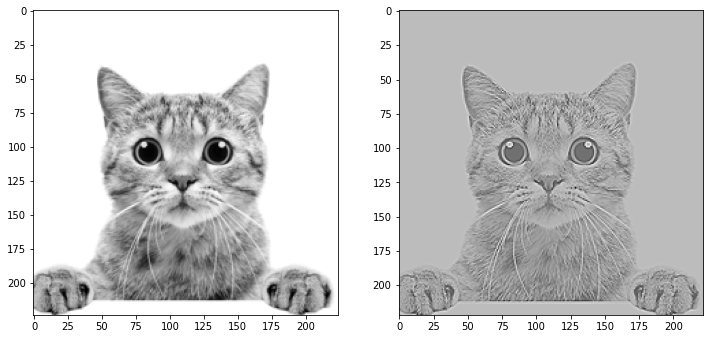

In [16]:
#let's visualize it

plot_two_images(
img1=img,
img2=img_sharpened
)

In [17]:
'''
The colors are a bit off since values in the matrix don't range between 0 and 255
It's not a problem, but we can "fix" it by replacing all negative values with zeros:
'''
def negative_to_zero(img: np.array) -> np.array:
    img = img.copy()
    img[img < 0] = 0
    return img

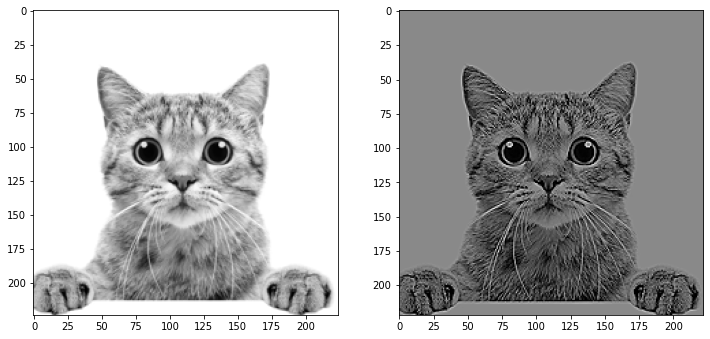

In [18]:
# and plot it again

plot_two_images(
img1=img,
img2=negative_to_zero(img=img_sharpened))

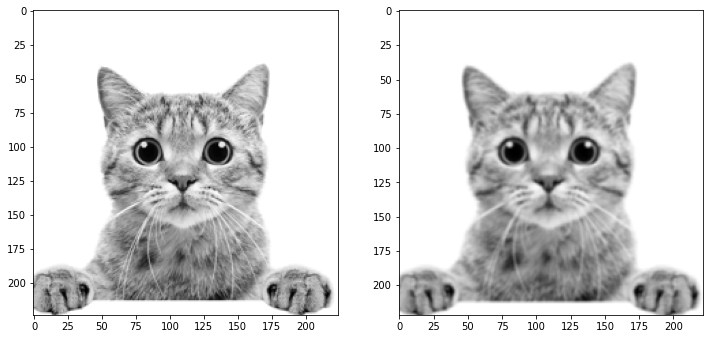

In [19]:
# let's blurr the image

img_blurred = convolve(img=np.array(img), kernel=blur)
plot_two_images(
img1=img,
img2=img_blurred)

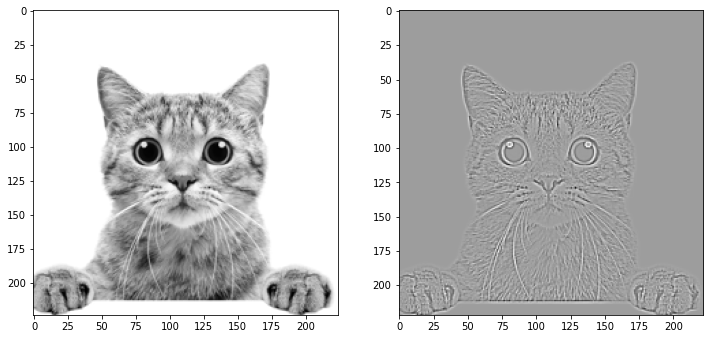

In [21]:
img_outlined = convolve(img=np.array(img), kernel = outline)
plot_two_images(
img1=img,
img2=img_outlined
)

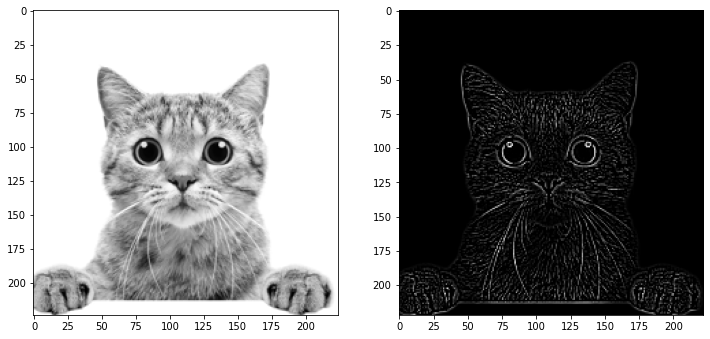

In [22]:
plot_two_images(
img1=img,
img2=negative_to_zero(img=img_outlined)
)

#### Implement convolutions with padding from scratch

In [23]:
def get_padding_width_per_side(kernel_size: int) -> int:
    #simple integer division
    return kernel_size //2

In [25]:
pad_3x3 = get_padding_width_per_side(kernel_size=3)
pad_3x3

1

In [26]:
pad_5x5 = get_padding_width_per_side(kernel_size=5)
pad_5x5

2

In [28]:
def add_padding_to_image(img: np.array, padding_width: int) -> np.array:
    #array of zeros of shape (image+padding_width)
    img_width_padding =np.zeros(shape=(
    img.shape[0] + padding_width * 2,
    img.shape[1] + padding_width * 2 
    ))
    
    #change the inner elements
    # for example if img.shape =(224,224), and img_width_padding = (226,226)
    #keep the pixel wide padding on all sides, but change the other values to the same as img
    
    img_width_padding[padding_width:-padding_width,padding_width:-padding_width] = img
    return img_width_padding

#### Let’s test it by adding a padding to the image for a 3x3 filter:

(226, 226)


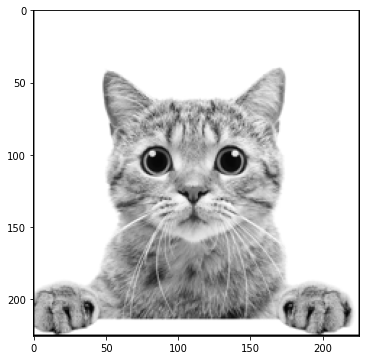

In [29]:
img_with_padding_3x3 = add_padding_to_image(
img=np.array(img),
padding_width = pad_3x3
)
print(img_with_padding_3x3.shape)
plot_image(img_with_padding_3x3)

In [30]:
'''
You can see the black border if you zoom in close enough. If you’re wondering, this image has a shape of 226x226 pixels. 
Here’s how it looks like when displayed as a matrix:
'''

img_with_padding_3x3

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 255., 255., ..., 255., 255.,   0.],
       [  0., 255., 255., ..., 255., 255.,   0.],
       ...,
       [  0., 255., 255., ..., 255., 255.,   0.],
       [  0., 254., 255., ..., 255., 255.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

(228, 228)


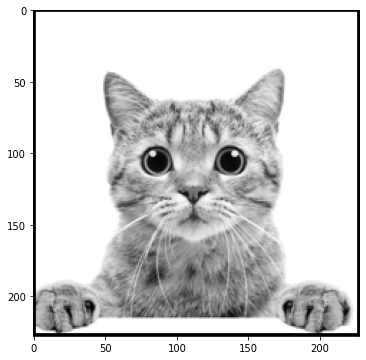

In [31]:
'''
You can see the original image surrounded with zeros, which is what we wanted. 
Let’s see if the same holds true for the 5x5 kernel:
'''

img_with_padding_5x5 = add_padding_to_image(
img=np.array(img),
padding_width=pad_5x5
)
print(img_with_padding_5x5.shape)
plot_image(img_with_padding_5x5)

In [32]:
img_with_padding_5x5

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0., 255., ..., 255.,   0.,   0.],
       ...,
       [  0.,   0., 254., ..., 255.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

(224, 224)


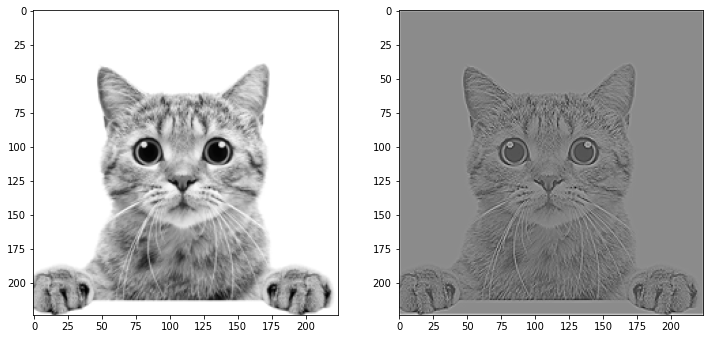

In [33]:
'''
It looks how it should — two pixel padding on all sides. 
Let’s apply a sharpening filter to our single-pixel-padded image to see if there are any issues:
'''
img_padded_3x3_sharpened = convolve(img=img_with_padding_3x3, kernel = sharpen)
print(img_padded_3x3_sharpened.shape)

plot_two_images(
img1=img,
img2=img_padded_3x3_sharpened)

In [ ]:
'''
Works without any issues. The convolved image has a shape of 224x224 pixels,
which is exactly what we wanted.
'''